In [65]:
import seaborn as sns

# import pipeline to make machinese learning pipeline to 
# overcome data leakage problem
from sklearn.pipeline import Pipeline 

# import StandardScaler to standize the column data
from sklearn.preprocessing import StandardScaler

# to split the data into train and test set of given data
from sklearn.model_selection import train_test_split

# to be used for defining the no. of folder for Cross Validation
from sklearn.model_selection import KFold

# to be used to find the score on given modle and KFlod
from sklearn.model_selection import cross_val_score

# to be used for Hyper-parameter
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Ensemble generally group more than one model to give better model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Python提供了许多魔法命令，使得在IPython环境中的操作更加得心应手。
# 魔法命令都以%或者%%开头，以%开头的成为行命令，%%开头的称为单元命令。
# 行命令只对命令所在的行有效，而单元命令则必须出现在单元的第一行，对整个单元的代码进行处理。
# %matplotlib inline 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步。
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('.\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train = pd.read_csv(r".\\titanic_input\\titanic\\train.csv")
test = pd.read_csv(r".\\titanic_input\\titanic\\test.csv")
PassengerId = test['PassengerId']
all_data = pd.concat([train, test], ignore_index=True)


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 1 数据分析与可视化 #
## 1.1 单特征分析 ##
### 1.1.1 性别与是否幸存的关系 ###


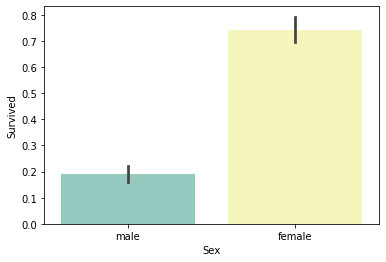

In [68]:
# 条形图只显示平均值（或其他估计值）
sns.barplot(x="Sex", y="Survived", data=train, palette="Set3")

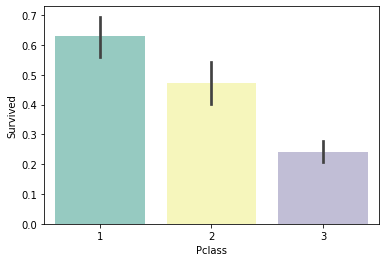

In [69]:
sns.barplot(x='Pclass', y='Survived', data=train, palette='Set3')

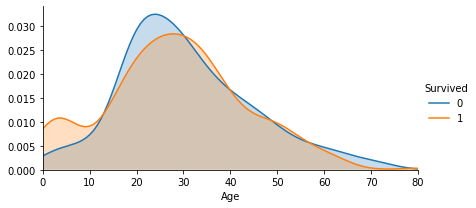

In [70]:
facet = sns.FacetGrid(train, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

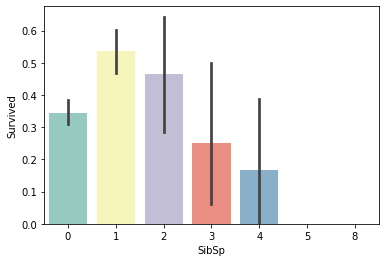

In [71]:
sns.barplot(x="SibSp", y="Survived", data=train, palette='Set3')

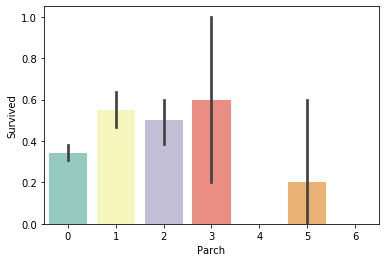

In [72]:
sns.barplot(x="Parch", y="Survived", data=train, palette='Set3')

In [73]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

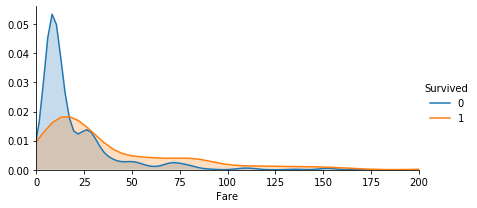

In [74]:
facet = sns.FacetGrid(train, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, 200))
facet.add_legend()

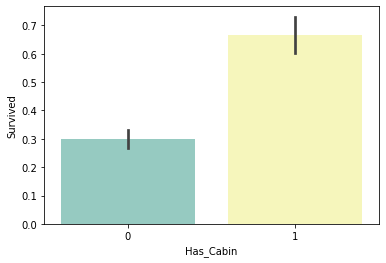

In [75]:
train.loc[train.Cabin.isnull(), 'Cabin'] = 'U0'
train['Has_Cabin'] = train['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)
sns.barplot(x="Has_Cabin", y="Survived", data=train, palette='Set3')

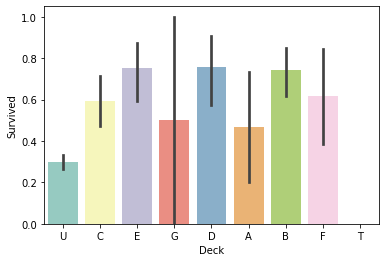

In [76]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck']=all_data['Cabin'].str.get(0)
sns.barplot(x="Deck", y="Survived", data=all_data, palette='Set3')

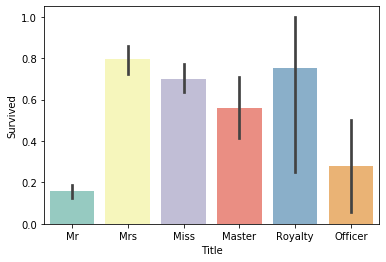

In [77]:
all_data['Title'] = all_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
all_data['Title'] = all_data['Title'].map(Title_Dict)
sns.barplot(x="Title", y="Survived", data=all_data, palette='Set3')

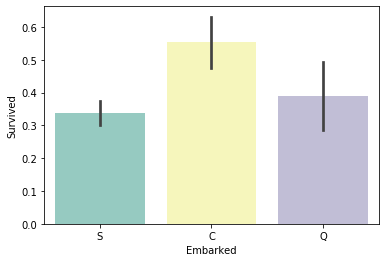

In [78]:
sns.barplot(x="Embarked", y="Survived", data=train, palette='Set3')

2.2 创造新特征

2.2.1 家庭人数与幸存是否有关系

我们在3.1中分析到兄弟姐妹特征，父母子女数可以生成一个新的特征：家庭人数。家庭人数也可以从侧面反映出一个家庭的经济状态，当然有一点我们不能忽略当家庭人员多的时候我们的行动都会受到限制需要照顾全家可能就会耽误最佳逃生时机。下面我们来分析看看是否如我们所想：


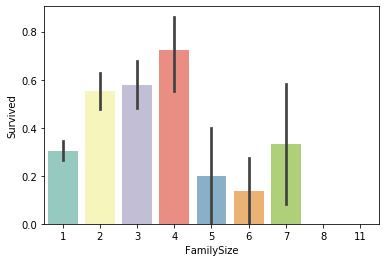

In [79]:
all_data['FamilySize']=all_data['SibSp']+all_data['Parch']+1
sns.barplot(x="FamilySize", y="Survived", data=all_data, palette='Set3')

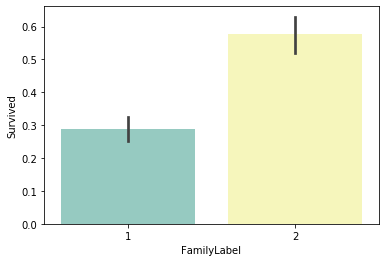

In [80]:
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <=7)) | (s==1):
        return 1
    elif (s > 7):
        return 1
all_data['FamilyLabel'] = all_data['FamilySize'].apply(Fam_label)
sns.barplot(x='FamilyLabel', y='Survived', data=all_data, palette='Set3')


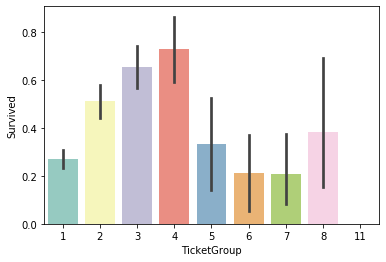

In [81]:
Ticket_Count = dict(all_data['Ticket'].value_counts())
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x:Ticket_Count[x])
sns.barplot(x='TicketGroup', y='Survived', data=all_data, palette='Set3')

# 3 数据清洗与缺失值填充
## 3.1 Age特征填充
在上面的分析中我们得知Age属性缺失很多，看多很多填充的方法，有用平均数的，有用中位数的，这2种方法其实都没有考虑到每个乘客的不同属性，看似合理其实是最懒最不合理的。我们可以结合几个特征构造随机森林模型来填充Age。


In [82]:

from sklearn import model_selection as cross_validation
# from sklearn import cross_validation

train = all_data[all_data['Survived'].notnull()]
test = all_data[all_data['Survived'].isnull()]

train_split1, train_split2 = cross_validation.train_test_split(train, test_size=0.5, random_state=32)

t1 = train_split1.copy()
t2 = train_split2.copy()



In [83]:
# Age 特征填充
from sklearn import model_selection as cross_validation
# from sklearn import cross_validation
from numpy import mat
from sklearn.ensemble import RandomForestRegressor


if (0 == all_data.Age.isnull().sum()):
    print('Age is already not null')


train = all_data[all_data['Survived'].notnull()]
test = all_data[all_data['Survived'].isnull()]

train_split1, train_split2 = cross_validation.train_test_split(train, test_size=0.5, random_state=32)


def predict_age_use_cross_validation(df1, df2, dfTest):
    age_df1 = df1[['Age', 'Pclass','Sex','Title']]
    age_df1 = pd.get_dummies(age_df1)
    age_df2 = df2[['Age', 'Pclass','Sex','Title']]
    age_df2 = pd.get_dummies(age_df2)

    
    # 转化为numpy.mat，因为矩阵运算是标准运算
    known_age = mat(age_df1[age_df1.Age.notnull()])
    unknow_age_df1 = mat(age_df1[age_df1.Age.isnull()])
    unknown_age = mat(age_df2[age_df2.Age.isnull()])
    
    y = known_age[:, 0]
    X = known_age[:, 1:]
    
    # 利用df1中有Age的数据对应的Pclass、Sex和Title信息，使用随机森林预测df1和df2中没有Age的行
    rfr = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
    rfr.fit(X, y)

    predictedAges = rfr.predict(unknown_age[:, 1::]) # :: 
    df2.loc[ (df2.Age.isnull()), 'Age' ] = predictedAges 

    predictedAges = rfr.predict(unknow_age_df1[:,1::])
    df1.loc[(df1.Age.isnull()),'Age'] = predictedAges
    
 
    # 利用已有的df2数据和Test中的已有数据为训练数据，去预测Test中没有Age的数据
    age_Test = dfTest[['Age', 'Pclass','Sex','Title']]
    age_Test = pd.get_dummies(age_Test)
    age_Tmp = df2[['Age', 'Pclass','Sex','Title']]
    age_Tmp = pd.get_dummies(age_Tmp)
    
    age_Tmp = pd.concat([age_Test[age_Test.Age.notnull()],age_Tmp])
    
    # 转化为numpy.mat，因为矩阵运算是标准运算
    known_age1 = mat(age_Tmp)
    unknown_age1 = mat(age_Test[age_Test.Age.isnull()])
    y = known_age1[:,0]
    X = known_age1[:,1:]
 
    rfr.fit(X, y)
    predictedAges = rfr.predict(unknown_age1[:, 1:])

    # 填充没有Age的数据，已有的Age数据不影响。loc是针对Index的，而isnull()返回的是
    # index(就是自定义的索引，区别与物理上的0,1,2...的索引值
    dfTest.loc[(dfTest.Age.isnull()), 'Age'] = predictedAges 
    
    return dfTest


t1 = train_split1.copy()
t2 = train_split2.copy()
tmp1 = test.copy()
t5 = predict_age_use_cross_validation(t1, t2, tmp1)
t1 = pd.concat([t1, t2])

t3 = train_split1.copy()
t4 = train_split2.copy()
tmp2 = test.copy()
t6 = predict_age_use_cross_validation(t4, t3, tmp2)
t3 = pd.concat([t3, t4])

# 这样做，为避免过拟合（即只以一组数据为准，）
train['Age'] = (t1['Age'] + t3['Age']) / 2
test['Age'] = (t5['Age'] + t6['Age']) / 2
all_data = pd.concat([train, test])


这里为什么这么处理呢，对训练集分为两半train1,train2,train1用作训练，然后填充train2的缺失值，然后用填充后的train2用来预测填充测试集。然后再来一次，这次用train2训练，train1填充。尽量降低对测试集的过拟合。

## 3.2 Embarked特征填充
我看到只缺失2个，我们去找寻这2个缺失值的共性，Sex,Pclass,SliSp,Cabin，Fare特征都相同，并且Embarked为登船口，我们可以结合我们生活，做火车地点和票价Fare有着密切的联系。Pclass为1登陆口为C的用Fare为80.0，所以我们填充C。


In [84]:
all_data[all_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,FamilySize,FamilyLabel,TicketGroup
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B,Miss,1,1,2
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B,Mrs,1,1,2


In [85]:
all_data[(all_data['Pclass']==1) & (all_data['Sex']=='female')].groupby('Embarked').size()

Embarked
C    71
Q     2
S    69
dtype: int64

In [86]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

## 3.3  Fare特征填充
Fare特征的缺失值也很少，我们同样可以利用几个相关的属性的中位数来填充，这里只给出代码：

In [87]:
all_data[all_data.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title,FamilySize,FamilyLabel,TicketGroup
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Unknown,S,U,Mr,1,1,1


In [88]:
fare = all_data[(all_data['Embarked'] == 'S') & (all_data['Pclass'] == 3)].Fare.median()
all_data['Fare'].fillna(fare, inplace=True)

## 4.4 同组识别
这部分，原封不动的借鉴SweetWine分享的思路。

把姓氏相同的乘客划分为同一组，从人数大于一的组中分别提取出每组的妇女儿童和成年男性

In [89]:
all_data['Surname']=all_data['Name'].apply(lambda x:x.split(',')[0].strip())
Surname_Count = dict(all_data['Surname'].value_counts())
all_data['FamilyGroup'] = all_data['Surname'].apply(lambda x:Surname_Count[x])
Female_Child_Group=all_data.loc[(all_data['FamilyGroup']>=2) & ((all_data['Age']<=12) | (all_data['Sex']=='female'))]
Male_Adult_Group=all_data.loc[(all_data['FamilyGroup']>=2) & (all_data['Age']>12) & (all_data['Sex']=='male')]

In [90]:
Female_Child=Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts()
Female_Child.columns=['GroupCount']
Female_Child

1.000000    115
0.000000     31
0.750000      2
0.333333      1
0.142857      1
Name: Survived, dtype: int64

发现绝大部分女性和儿童组的平均存活率都为1或0，即同组的女性和儿童要么全部幸存，要么全部遇难。

In [91]:
Male_Adult=Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts()
Male_Adult.columns=['GroupCount']
Male_Adult

0.000000    122
1.000000     20
0.500000      6
0.333333      2
0.250000      1
Name: Survived, dtype: int64

绝大部分成年男性组的平均存活率也为1或0。

In [92]:
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)

{'Cacic', 'Palsson', 'Bourke', 'Attalah', 'Johnston', 'Jussila', 'Olsson', 'Ford', 'Strom', 'Boulos', 'Rice', 'Panula', 'Skoog', 'Van Impe', 'Goodwin', 'Turpin', 'Barbara', 'Ilmakangas', 'Caram', 'Arnold-Franchi', 'Oreskovic', 'Rosblom', 'Canavan', 'Lahtinen', 'Robins', 'Sage', 'Danbom', 'Lefebre', 'Lobb', 'Vander Planke', 'Zabour'}
{'Frolicher-Stehli', 'Goldenberg', 'Harder', 'Nakid', 'Chambers', 'Jussila', 'Daly', 'Bishop', 'Frauenthal', 'Bradley', 'Taylor', 'Beckwith', 'Greenfield', 'Dick', 'Jonsson', 'McCoy', 'Beane', 'Duff Gordon', 'Cardeza', 'Kimball'}


为了使处于这两种反常组中的样本能够被正确分类，对测试集中处于反常组中的样本的Age，Title，Sex进行惩罚修改

那为什么不对train组中的样本的Age、Title和Sex进行惩罚修改呢？

In [93]:
train=all_data.loc[all_data['Survived'].notnull()]
test=all_data.loc[all_data['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Title'] = 'Miss'

我的思考：我们从上面单特征的分析就得知女性和儿童的幸存率很高，成年男性的幸存率很低。对于女性和儿童遇难的，成年男性幸存的都是异常的样本，在SVM模型中可以加上松弛变量与惩罚因子的道理一样。

##3.5 特征转换

在这里我们把处理数值类型特征

In [94]:
all_data=pd.concat([train, test])
all_data=all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','FamilyLabel','Deck','TicketGroup']]
all_data=pd.get_dummies(all_data)
train=all_data[all_data['Survived'].notnull()]
test=all_data[all_data['Survived'].isnull()].drop('Survived',axis=1)
X = mat(train)[:,1:]
y = mat(train)[:,0]

#4. 模型选择与调参

##4.1.1模型选择

随机森林有着众多优点，我们也对异常样本进行了惩罚不用担心过拟合的问题。当然GDBT,XGboost现在是数据挖掘比赛最常用的模型，但是面对这么小的数据量我还是建议用随机森林，或者说用简单的逻辑回归模型（需对票价和年龄进行缩放）。



In [95]:
from sklearn.feature_selection import SelectKBest
# Pipeline
# SelectKBest 数据预处理过滤特征，选取SelectKBest模型

pipe=Pipeline([('select',SelectKBest(k=20)), 
               ('classify', RandomForestClassifier(random_state = 10, max_features = 'sqrt'))])
 
param_test = {'classify__n_estimators':list(range(20,50,2)), 
              'classify__max_depth':list(range(3,60,3))}
gsearch = GridSearchCV(estimator = pipe, param_grid = param_test, scoring='roc_auc', cv=10)
gsearch.fit(X,y)
print(gsearch.best_params_, gsearch.best_score_)

{'classify__max_depth': 6, 'classify__n_estimators': 48} 0.8755696177460882


In [96]:
from sklearn.cluster import KMeans

clf=KMeans(n_clusters=5) #创建分类器对象
fit_clf=clf.fit(X)  #用训练器数据拟合分类器模型
clf.predict(X) #也可以给新数据数据对其预测

print(clf.cluster_centers_) #输出5个类的聚类中心

y_pred = clf.fit_predict(X)  #用训练器数据X拟合分类器模型并对训练器数据X进行预测

print(y_pred)  #输出预测结果

[[ 2.56981664e+00  2.80855224e+01  1.46723602e+01  1.26093089e+00
   1.70944993e+00  3.08885755e-01  6.91114245e-01  1.38222849e-01
   1.05782793e-01  7.55994358e-01  4.79548660e-02  1.93229901e-01
   6.23413258e-01  1.14245416e-01  1.97461213e-02  1.41043724e-03
   9.87306065e-03  1.26939351e-02  2.11565585e-02  1.69252468e-02
   2.11565585e-02  1.83356841e-02  5.64174894e-03  1.41043724e-03
   8.92806770e-01]
 [ 1.00000000e+00  3.28985273e+01  1.31108200e+02  1.72727273e+00
   3.81818182e+00  6.66666667e-01  3.33333333e-01  5.15151515e-01
   4.16333634e-17  4.84848485e-01  6.06060606e-02  3.93939394e-01
   2.42424242e-01  2.72727273e-01  3.03030303e-02 -3.46944695e-18
   3.46944695e-18  1.81818182e-01  4.54545455e-01  9.09090909e-02
   6.06060606e-02  6.93889390e-18 -3.46944695e-18 -8.67361738e-19
   2.12121212e-01]
 [ 1.00000000e+00  3.53333333e+01  5.12329200e+02  1.33333333e+00
   4.00000000e+00  3.33333333e-01  6.66666667e-01  1.00000000e+00
   0.00000000e+00 -1.11022302e-16  6.9

X, y = make_classification(n_samples=10000, # 样本个数     
n_features=25, # 特征个数      
n_informative=3, # 有效特征个数    
n_redundant=2, # 冗余特征个数（有效特征的随机组合）    
n_repeated=0, # 重复特征个数（有效特征和冗余特征的随机组合）       
n_classes=3, # 样本类别    
n_clusters_per_class=1, # 簇的个数     
random_state=0)    


In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=9, n_redundant=0,
                           n_classes=4,
                           random_state=0, shuffle=False)
    
print(y)
clf = AdaBoostClassifier(n_estimators=1, random_state=0)
clf.fit(X, y)
result = clf.predict([[10, 0, 10, 0]])
clf.score(X, y)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 4 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=100, random_state=0)
clf.fit(X, y)

print(clf.predict([[0, 0, 0, 0]]))

clf.score(X, y)

[1]


1.0

In [28]:
import numpy as np
from sklearn.svm import SVR

X = np.array([[1,1], [1,2], [2,2], [2,3]])
y = np.dot(X, np.array([1,2 ])) + 3
print(y)

model = SVR()
model.fit(X,y)
print(model.predict(X))

[ 6  8  9 11]
[7.44500403 8.09999999 8.90000001 9.55499597]


In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
print(y)
reg = LinearRegression().fit(X, y)


print(reg.coef_)

print(reg.intercept_)

print(reg.predict(np.array([[3, 5]])))



[ 6  8  9 11]
[1. 2.]
3.000000000000001
[16.]


In [47]:
import numpy as np
X = np.reshape(np.arange(100),[-1,20])
# data = np.arange(100)
# X = data.reshape([-1, 20])
print(X)
y = 0.3*X + 1 # any element
print(y)
reg.fit(X,y)
print(reg.score(X, y))
reg.coef_
reg.intercept_


[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]
[[ 1.   1.3  1.6  1.9  2.2  2.5  2.8  3.1  3.4  3.7  4.   4.3  4.6  4.9
   5.2  5.5  5.8  6.1  6.4  6.7]
 [ 7.   7.3  7.6  7.9  8.2  8.5  8.8  9.1  9.4  9.7 10.  10.3 10.6 10.9
  11.2 11.5 11.8 12.1 12.4 12.7]
 [13.  13.3 13.6 13.9 14.2 14.5 14.8 15.1 15.4 15.7 16.  16.3 16.6 16.9
  17.2 17.5 17.8 18.1 18.4 18.7]
 [19.  19.3 19.6 19.9 20.2 20.5 20.8 21.1 21.4 21.7 22.  22.3 22.6 22.9
  23.2 23.5 23.8 24.1 24.4 24.7]
 [25.  25.3 25.6 25.9 26.2 26.5 26.8 27.1 27.4 27.7 28.  28.3 28.6 28.9
  29.2 29.5 29.8 30.1 30.4 30.7]]
1.0


svm 使用示例

In [71]:
import numpy as np
from sklearn.svm import SVR
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
print(y)   
# model = SVR(kernel='rbf', gamma=0.1, C=50)
model = SVR(kernel='rbf', gamma=0.1, C=50)
model.fit(X,y)
ret = model.predict(X)
print(ret)
print(model.score(X,y))


[ 6  8  9 11]
[ 6.09999996  7.974785    9.025215   10.90000004]
0.9983637249070516
